In [36]:
import numpy as np
import pandas as pd

# Set a consistent seed for reproducibility
np.random.seed(789)

# --- Define the desired final data sizes ---
NUM_PLACED = 120
NUM_NOT_PLACED = 80
NUM_FINAL = NUM_PLACED + NUM_NOT_PLACED

# --- 1. Generate Data for PLACED Students (Class = 1) ---
# Goal: High CGPA and High Resume Score
cgpa_placed = np.random.uniform(low=7.5, high=10.0, size=NUM_PLACED)
# Resume score will be slightly higher for this group
resume_placed = np.random.uniform(low=60.0, high=70.0, size=NUM_PLACED)
placed_label = np.ones(NUM_PLACED, dtype=int)

placed_df = pd.DataFrame({
    'cgpa': np.round(cgpa_placed, 2),
    'resume_score': np.round(resume_placed, 2),
    'placed': placed_label
})

# --- 2. Generate Data for NOT PLACED Students (Class = 0) ---
# Goal: Lower CGPA and Lower Resume Score
cgpa_not_placed = np.random.uniform(low=6.0, high=7.5, size=NUM_NOT_PLACED)
# Resume score will be slightly lower for this group
resume_not_placed = np.random.uniform(low=50.0, high=62.0, size=NUM_NOT_PLACED)
not_placed_label = np.zeros(NUM_NOT_PLACED, dtype=int)

not_placed_df = pd.DataFrame({
    'cgpa': np.round(cgpa_not_placed, 2),
    'resume_score': np.round(resume_not_placed, 2),
    'placed': not_placed_label
})

# --- 3. Combine and Shuffle the final data ---
final_data = pd.concat([placed_df, not_placed_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# --- Display the result ---
print("Final Balanced Student Data (Total: 200 students)")
print("------------------------------------------------------")
print(final_data.head(10))

print("\nPlacement Status Distribution in the Final Data:")
print(final_data['placed'].value_counts())

Final Balanced Student Data (Total: 200 students)
------------------------------------------------------
   cgpa  resume_score  placed
0  8.30         64.14       1
1  9.10         63.17       1
2  9.55         69.42       1
3  6.75         57.30       0
4  7.35         59.08       0
5  8.92         64.70       1
6  9.71         65.93       1
7  6.74         54.31       0
8  7.20         50.38       0
9  8.93         64.63       1

Placement Status Distribution in the Final Data:
placed
1    120
0     80
Name: count, dtype: int64


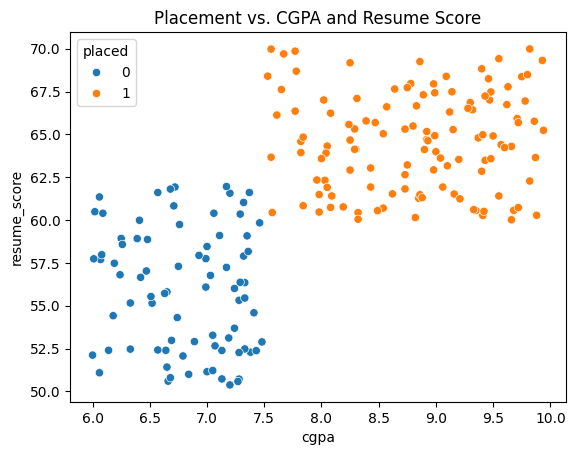

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=final_data, x='cgpa', y='resume_score', hue='placed')
plt.title('Placement vs. CGPA and Resume Score')
plt.show()

In [39]:
x=final_data.iloc[:,0:2]
y=final_data.iloc[:,2]
from sklearn.linear_model import Perceptron
p=Perceptron()
p.fit(x,y)

Perceptron()

In [40]:
p.coef_

array([[716.88, -40.31]])

In [41]:
p.intercept_

array([-152.])

In [42]:
W1 = 716.88       # Weight for CGPA (x-axis)
W2 = -40.31       # Weight for Resume Score (y-axis)
b = -152.0

In [43]:
line = np.linspace(6,10,100)

pline = (-W1 * line - b) / W2

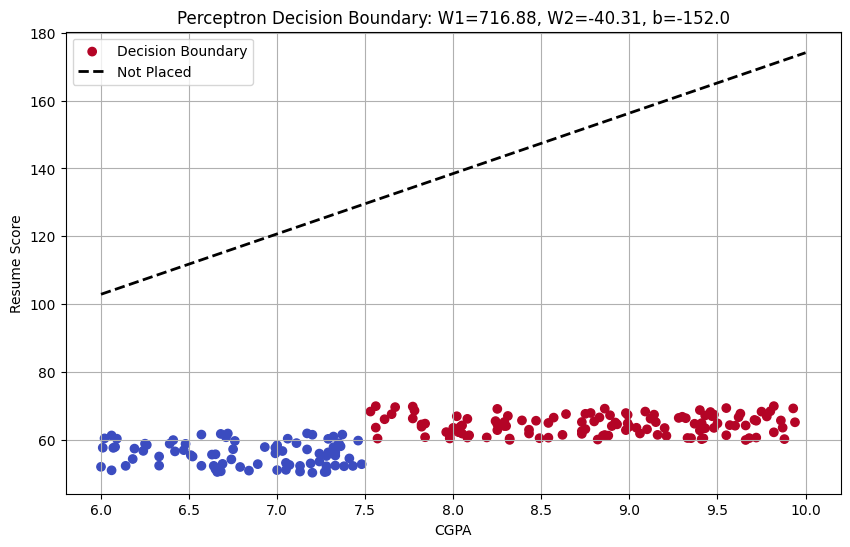

In [44]:
plt.figure(figsize=(10, 6))

# Scatter the original data points
plt.scatter(x['cgpa'], x['resume_score'], c=y, cmap=plt.cm.coolwarm)

# Plot the calculated decision boundary line
plt.plot(line, pline, color='black', linestyle='--', linewidth=2, label='Decision Boundary')


# Final plot settings
plt.xlabel('CGPA')
plt.ylabel('Resume Score')
plt.title(f'Perceptron Decision Boundary: W1={W1}, W2={W2}, b={b}')
plt.legend(['Decision Boundary', 'Not Placed', 'Placed'])
plt.grid(True)
plt.show()

In [28]:
m=-p.coef_[0][0]/p.coef_[0][1]
c=-p.intercept_[0]/p.coef_[0][1]
yline=np.linspace(6,10)
xline=m*xline+c

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


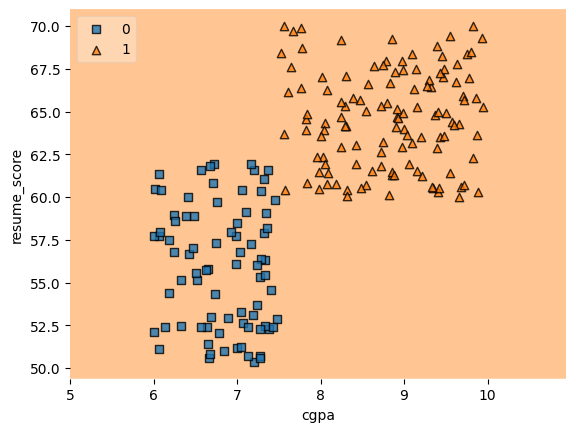

In [30]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
line_style_kwargs = {'colors': 'black','linestyles': 'solid', 'linewidths': 2 }

plot_decision_regions(x.values, y.values, clf=p,legend=2,  contour_kwargs=line_style_kwargs)
plt.xlabel('cgpa')
plt.ylabel('resume_score')
plt.show()

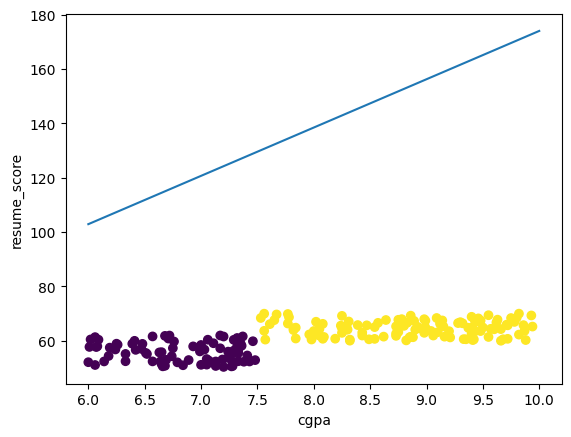

In [29]:

plt.scatter(x['cgpa'],x['resume_score'],c=y)
plt.plot(yline,xline)
plt.xlabel('cgpa')
plt.ylabel('resume_score')
plt.show()

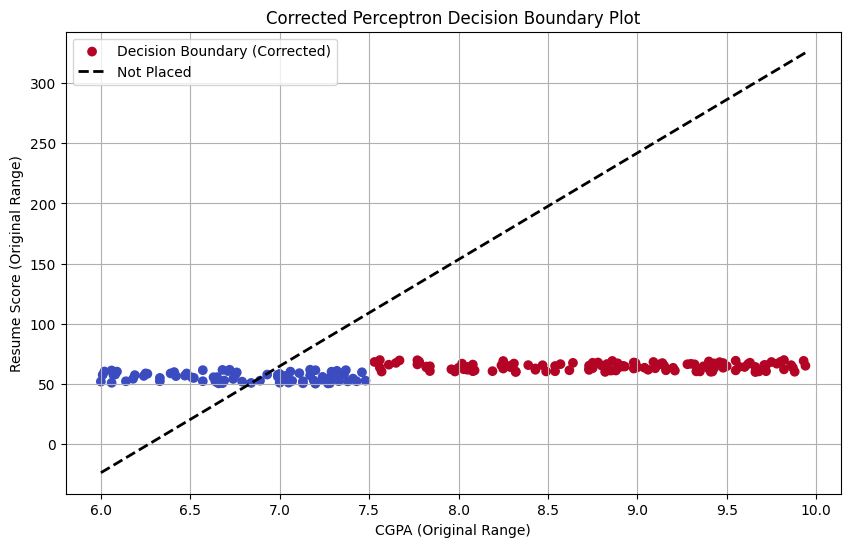

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Provided Perceptron Parameters (Learned on SCALED Data) ---
W_scaled = np.array([716.88, -40.31])  # [W1_scaled, W2_scaled]
b_scaled = -152.0                      # Bias/Intercept

# --- 2. Regenerated Data (CRITICAL for Min/Max values) ---
np.random.seed(789)
NUM_PLACED = 120
NUM_NOT_PLACED = 80

# Data Generation on Original Scales
cgpa_placed = np.random.uniform(low=7.5, high=10.0, size=NUM_PLACED)
resume_placed = np.random.uniform(low=60.0, high=70.0, size=NUM_PLACED)
placed_df = pd.DataFrame({'cgpa': np.round(cgpa_placed, 2), 'resume_score': np.round(resume_placed, 2), 'placed': np.ones(NUM_PLACED, dtype=int)})
cgpa_not_placed = np.random.uniform(low=6.0, high=7.5, size=NUM_NOT_PLACED)
resume_not_placed = np.random.uniform(low=50.0, high=62.0, size=NUM_NOT_PLACED)
not_placed_df = pd.DataFrame({'cgpa': np.round(cgpa_not_placed, 2), 'resume_score': np.round(resume_not_placed, 2), 'placed': np.zeros(NUM_NOT_PLACED, dtype=int)})
final_data = pd.concat([placed_df, not_placed_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define x and y (Features and Target)
x = final_data[['cgpa', 'resume_score']]
y = final_data['placed']

# --- 3. Capture Scaling Factors ---
x1_min, x1_max = x['cgpa'].min(), x['cgpa'].max()
x2_min, x2_max = x['resume_score'].min(), x['resume_score'].max()
x1_range = x1_max - x1_min
x2_range = x2_max - x2_min

# --- 4. CONVERT SCALED PARAMETERS TO ORIGINAL PARAMETERS ---
# W_orig = W_scaled / X_range
W1_orig = W_scaled[0] / x1_range
W2_orig = W_scaled[1] / x2_range
b_orig = b_scaled - (W_scaled[0] * x1_min / x1_range) - (W_scaled[1] * x2_min / x2_range)

# --- 5. Plot the Data and the Line ---

plt.figure(figsize=(10, 6))

# Scatter the original data points
plt.scatter(x['cgpa'], x['resume_score'], c=y, cmap=plt.cm.coolwarm)

# Define the x-axis range (CGPA) for the line plot
line = np.linspace(x1_min, x1_max, 100)

# Calculate the corresponding y-axis values (Resume Score) using the UN-SCALED parameters
# Formula: x2_orig = (-W1_orig * x1_orig - b_orig) / W2_orig
pline = (-W1_orig * line - b_orig) / W2_orig

# Plot the Decision Boundary Line
plt.plot(line, pline, color='black', linestyle='--', linewidth=2, label='Decision Boundary (Corrected)')


# Final plot settings
plt.xlabel('CGPA (Original Range)')
plt.ylabel('Resume Score (Original Range)')
plt.title('Corrected Perceptron Decision Boundary Plot')
plt.legend(['Decision Boundary (Corrected)', 'Not Placed', 'Placed'])
plt.grid(True)
plt.show()

In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Useful for later!

# --- A. GUARANTEED BALANCED DATA GENERATION ---
np.random.seed(789)
NUM_PLACED = 120
NUM_NOT_PLACED = 80

# Generate Data on Original Scales
cgpa_placed = np.random.uniform(low=7.5, high=10.0, size=NUM_PLACED)
resume_placed = np.random.uniform(low=60.0, high=70.0, size=NUM_PLACED)
placed_df = pd.DataFrame({'cgpa': np.round(cgpa_placed, 2), 'resume_score': np.round(resume_placed, 2), 'placed': np.ones(NUM_PLACED, dtype=int)})

cgpa_not_placed = np.random.uniform(low=6.0, high=7.5, size=NUM_NOT_PLACED)
resume_not_placed = np.random.uniform(low=50.0, high=62.0, size=NUM_NOT_PLACED)
not_placed_df = pd.DataFrame({'cgpa': np.round(cgpa_not_placed, 2), 'resume_score': np.round(resume_not_placed, 2), 'placed': np.zeros(NUM_NOT_PLACED, dtype=int)})

final_data = pd.concat([placed_df, not_placed_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define X (Features) and y (Target)
X = final_data[['cgpa', 'resume_score']].values
y = final_data['placed'].values

# --- B. SCALING DATA ---
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# --- C. SKLEARN PERCEPTRON MODEL ---
# The sklearn Perceptron uses a slightly different convention for the target labels
# (-1 and 1) internally, but it handles {0, 1} targets correctly by default.
# The 'eta0' parameter is the learning rate, and 'max_iter' is the number of epochs.
# We set 'random_state' for reproducibility.
# 'tol=None' ensures the model runs for the full max_iter instead of stopping early.
p = Perceptron(eta0=0.1, max_iter=20, random_state=42, tol=None)

# Train the model
p.fit(X_scaled, y)

# --- D. DISPLAY RESULTS ---
print("Perceptron Training Complete using scikit-learn.")
print("-" * 40)
print(f"Learned Coefficients (Weights): {p.coef_}")
print(f"Learned Intercept (Bias): {p.intercept_}")

# Calculate and display the training accuracy
train_accuracy = p.score(X_scaled, y)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")

Perceptron Training Complete using scikit-learn.
----------------------------------------
Learned Coefficients (Weights): [[0.60507614 0.23977562]]
Learned Intercept (Bias): [-0.4]

Training Accuracy: 0.9950


Perceptron Training Complete using scikit-learn.
----------------------------------------
Learned Coefficients (Weights on SCALED data): [0.60507614 0.23977562]
Learned Intercept (Bias on SCALED data): -0.4
Training Accuracy: 0.9950

Converted Parameters for ORIGINAL Feature Space:
  Weights (Original): [0.15, 0.01]
  Bias (Original): -1.94


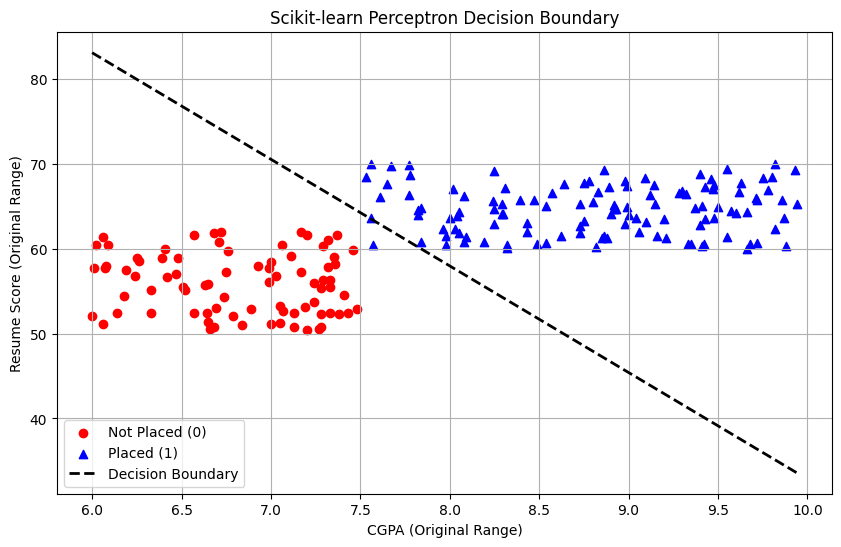

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler

# --- 1. GUARANTEED BALANCED DATA GENERATION ---
np.random.seed(789)
NUM_PLACED = 120
NUM_NOT_PLACED = 80

# Generate Data on Original Scales
cgpa_placed = np.random.uniform(low=7.5, high=10.0, size=NUM_PLACED)
resume_placed = np.random.uniform(low=60.0, high=70.0, size=NUM_PLACED)
placed_df = pd.DataFrame({'cgpa': np.round(cgpa_placed, 2), 'resume_score': np.round(resume_placed, 2), 'placed': np.ones(NUM_PLACED, dtype=int)})

cgpa_not_placed = np.random.uniform(low=6.0, high=7.5, size=NUM_NOT_PLACED)
resume_not_placed = np.random.uniform(low=50.0, high=62.0, size=NUM_NOT_PLACED)
not_placed_df = pd.DataFrame({'cgpa': np.round(cgpa_not_placed, 2), 'resume_score': np.round(resume_not_placed, 2), 'placed': np.zeros(NUM_NOT_PLACED, dtype=int)})

final_data = pd.concat([placed_df, not_placed_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define X_original (Features) and y (Target)
X_original = final_data[['cgpa', 'resume_score']].values
y = final_data['placed'].values

# --- 2. CAPTURE SCALING FACTORS AND SCALE DATA ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_original)

# Store min/max for original features (used for reverse transformation)
# These are directly accessible from the fitted scaler
x1_min, x1_max = scaler.data_min_[0], scaler.data_max_[0] # CGPA min/max
x2_min, x2_max = scaler.data_min_[1], scaler.data_max_[1] # Resume Score min/max
x1_range = scaler.data_range_[0]
x2_range = scaler.data_range_[1]

# --- 3. SKLEARN PERCEPTRON MODEL TRAINING ---
p = Perceptron(eta0=0.1, max_iter=20, random_state=42, tol=None)
p.fit(X_scaled, y)

# --- 4. EXTRACT LEARNED PARAMETERS (from scaled space) ---
W_scaled = p.coef_[0]  # Array of weights: [W_cgpa_scaled, W_resume_scaled]
b_scaled = p.intercept_[0] # Bias/Intercept

print("Perceptron Training Complete using scikit-learn.")
print("-" * 40)
print(f"Learned Coefficients (Weights on SCALED data): {W_scaled}")
print(f"Learned Intercept (Bias on SCALED data): {b_scaled}")
train_accuracy = p.score(X_scaled, y)
print(f"Training Accuracy: {train_accuracy:.4f}")

# --- 5. CONVERT SCALED PARAMETERS TO ORIGINAL FEATURE SPACE ---
W1_scaled, W2_scaled = W_scaled[0], W_scaled[1]

W1_orig = W1_scaled / x1_range
W2_orig = W2_scaled / x2_range
b_orig = b_scaled - (W1_scaled * x1_min / x1_range) - (W2_scaled * x2_min / x2_range)

print("\nConverted Parameters for ORIGINAL Feature Space:")
print(f"  Weights (Original): [{W1_orig:.2f}, {W2_orig:.2f}]")
print(f"  Bias (Original): {b_orig:.2f}")

# --- 6. PLOT THE DATA AND THE DECISION BOUNDARY LINE ---

plt.figure(figsize=(10, 6))

# Scatter the original data points
plt.scatter(X_original[y == 0, 0], X_original[y == 0, 1], color='red', marker='o', label='Not Placed (0)')
plt.scatter(X_original[y == 1, 0], X_original[y == 1, 1], color='blue', marker='^', label='Placed (1)')

# Calculate the decision boundary line coordinates using the UN-SCALED parameters
# Line equation: x2_orig = (-W1_orig * x1_orig - b_orig) / W2_orig

# Create an array of x1 (CGPA) values across the plot range
x1_line_orig = np.linspace(x1_min, x1_max, 100)

# Calculate the corresponding x2 (Resume Score) values
# Handle potential division by zero if W2_orig is very close to zero
if np.isclose(W2_orig, 0):
    # If W2 is zero, the line is vertical: x1_orig = -b_orig / W1_orig
    # We will plot a vertical line at this x1_orig value
    plt.axvline(x=-b_orig / W1_orig, color='black', linestyle='--', linewidth=2, label='Decision Boundary')
else:
    pline = (-W1_orig * x1_line_orig - b_orig) / W2_orig
    plt.plot(x1_line_orig, pline, color='black', linestyle='--', linewidth=2, label='Decision Boundary')

# Final plot settings
plt.xlabel('CGPA (Original Range)')
plt.ylabel('Resume Score (Original Range)')
plt.title('Scikit-learn Perceptron Decision Boundary')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

⚙️ 1️⃣ What’s happening conceptually

You train your Perceptron on scaled features — i.e., after you apply the MinMaxScaler, your input features cgpa and resume_score are compressed into the range [0, 1].

So your perceptron learns a decision boundary in the scaled feature space, not in the original feature units.

That’s why the model gives you:

W_scaled = [W1, W2]
b_scaled = b


These are weights on scaled features
𝑥
1
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
,
𝑥
2
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
x1
s
	​

caled,x2
s
	​

caled.

⚙️ 2️⃣ The decision equation (in scaled space)

In scaled space, the perceptron boundary is:

𝑊
1
⋅
𝑥
1
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
+
𝑊
2
⋅
𝑥
2
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
+
𝑏
=
0
W1⋅x1
scaled
	​

+W2⋅x2
scaled
	​

+b=0

But you want to plot the line on the original feature axes — CGPA and Resume Score — not scaled (0–1) values.

So we need to express this same line in terms of original features
𝑥
1
𝑜
𝑟
𝑖
𝑔
,
𝑥
2
𝑜
𝑟
𝑖
𝑔
x1
orig
	​

,x2
orig
	​

.

⚙️ 3️⃣ The scaling formula

For MinMax scaling:

𝑥
1
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
=
𝑥
1
𝑜
𝑟
𝑖
𝑔
−
𝑥
1
𝑚
𝑖
𝑛
𝑥
1
𝑚
𝑎
𝑥
−
𝑥
1
𝑚
𝑖
𝑛
x1
scaled
	​

=
x1
max
	​

−x1
min
	​

x1
orig
	​

−x1
min
	​

	​

𝑥
2
𝑠
𝑐
𝑎
𝑙
𝑒
𝑑
=
𝑥
2
𝑜
𝑟
𝑖
𝑔
−
𝑥
2
𝑚
𝑖
𝑛
𝑥
2
𝑚
𝑎
𝑥
−
𝑥
2
𝑚
𝑖
𝑛
x2
scaled
	​

=
x2
max
	​

−x2
min
	​

x2
orig
	​

−x2
min
	​

	​


Let’s denote:

𝑟
1
=
𝑥
1
𝑚
𝑎
𝑥
−
𝑥
1
𝑚
𝑖
𝑛
,
𝑟
2
=
𝑥
2
𝑚
𝑎
𝑥
−
𝑥
2
𝑚
𝑖
𝑛
r1=x1
max
	​

−x1
min
	​

,r2=x2
max
	​

−x2
min
	​

⚙️ 4️⃣ Substitute and expand

Plug these into the perceptron equation:

𝑊
1
(
𝑥
1
𝑜
𝑟
𝑖
𝑔
−
𝑥
1
𝑚
𝑖
𝑛
𝑟
1
)
+
𝑊
2
(
𝑥
2
𝑜
𝑟
𝑖
𝑔
−
𝑥
2
𝑚
𝑖
𝑛
𝑟
2
)
+
𝑏
=
0
W1(
r1
x1
orig
	​

−x1
min
	​

	​

)+W2(
r2
x2
orig
	​

−x2
min
	​

	​

)+b=0

Multiply through to remove denominators:

𝑊
1
𝑟
1
𝑥
1
𝑜
𝑟
𝑖
𝑔
+
𝑊
2
𝑟
2
𝑥
2
𝑜
𝑟
𝑖
𝑔
+
(
𝑏
−
𝑊
1
𝑥
1
𝑚
𝑖
𝑛
𝑟
1
−
𝑊
2
𝑥
2
𝑚
𝑖
𝑛
𝑟
2
)
=
0
r1
W1
	​

x1
orig
	​

+
r2
W2
	​

x2
orig
	​

+(b−
r1
W1x1
min
	​

	​

−
r2
W2x2
min
	​

	​

)=0
⚙️ 5️⃣ Recognize new parameters

Now you can define equivalent weights in the original space:

𝑊
1
𝑜
𝑟
𝑖
𝑔
=
𝑊
1
𝑟
1
W1
orig
	​

=
r1
W1
	​

𝑊
2
𝑜
𝑟
𝑖
𝑔
=
𝑊
2
𝑟
2
W2
orig
	​

=
r2
W2
	​

𝑏
𝑜
𝑟
𝑖
𝑔
=
𝑏
−
𝑊
1
𝑥
1
𝑚
𝑖
𝑛
𝑟
1
−
𝑊
2
𝑥
2
𝑚
𝑖
𝑛
𝑟
2
b
orig
	​

=b−
r1
W1x1
min
	​

	​

−
r2
W2x2
min
	​

	​


These make the boundary equation valid in the original CGPA–Resume Score plane:

𝑊
1
𝑜
𝑟
𝑖
𝑔
⋅
𝑥
1
𝑜
𝑟
𝑖
𝑔
+
𝑊
2
𝑜
𝑟
𝑖
𝑔
⋅
𝑥
2
𝑜
𝑟
𝑖
𝑔
+
𝑏
𝑜
𝑟
𝑖
𝑔
=
0
W1
orig
	​

⋅x1
orig
	​

+W2
orig
	​

⋅x2
orig
	​

+b
orig
	​

=0
⚙️ 6️⃣ So, the “juggle” means:
Concept	Symbol	Explanation
W1 and W2	Learned on scaled data (range 0–1).
W1_orig, W2_orig	Converted to match the original feature scales (CGPA 6–10, Resume Score 50–70).
b_orig	Adjusted intercept so that the same boundary holds in original space.
⚙️ 7️⃣ Visual intuition

If you didn’t convert back:

You’d plot a line that looks wrong,

Because the perceptron weights correspond to compressed axes.

When you “unjuggle” (i.e., compute W1_orig, W2_orig, b_orig),
you’re stretching the decision boundary back to the correct shape in the true feature space.